# International football results from 1872 to 2019

## Context

Well, what happened was that I was looking for a semi-definite easy-to-read list of international football matches and couldn't find anything decent. So I took it upon myself to collect it for my own use. I might as well share it.

## Content

This dataset includes 40,838 results of international football matches starting from the very first official match in 1972 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

'results.csv' includes the following columns:

1. date - date of the match
2. home_team - the name of the home team
3. away_team - the name of the away team
4. home_score - full-time home team score including extra time, not including penalty-shootouts
5. away_score - full-time away team score including extra time, not including penalty-shootouts
6. tournament - the name of the tournament
7. city - the name of the city/town/administrative unit where the match was played
8. country - the name of the country where the match was played
9. neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

## Acknowledgements

The data is gathered from several sources including but not limited to Wikipedia, fifa.com, rsssf.com and individual football associations' websites.

## Inspiration

Some directions to take when exploring the data:

1. Who is the best team of all time
2. Which teams dominated different eras of football
3. What trends have there been in international football throughout the ages - home advantage, total goals scored, distribution of teams' strength etc
4. Can we say anything about geopolitics from football fixtures - how has the number of countries changed, which teams like to play each other
5. Which countries host the most matches where they themselves are not participating in
6. How much, if at all, does hosting a major tournament help a country's chances in the tournament
7. Which teams are the most active in playing friendlies and friendly tournaments - does it help or hurt them

The world's your oyster, my friend.

# Stage 1 - Import the Dataset and Libraries:

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset:

In [2]:
path_directory = '/Users/y.s.lee/OneDrive/MSc Data Science/Semester 3/Data VIsualisation NEW (COMP5048)/Assignments/Assignment 2/Data/'

data_football = pd.read_csv(path_directory + 'results.csv')

# Stage 2 - Review the Dataset:

In [3]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
data_football.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [5]:
data_football.shape

(40839, 9)

In [6]:
data_football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


# Stage 3 - Clean the Dataset:

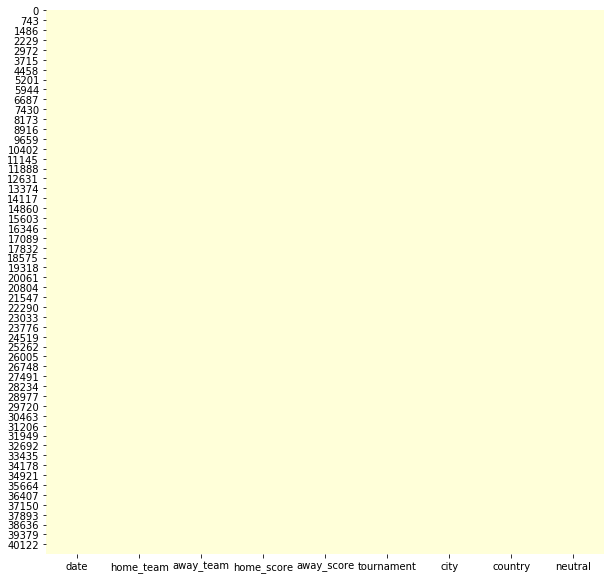

In [7]:
# Visualise it:

plt.figure(figsize=(10,10))
sns.heatmap(data_football.isnull(), cbar = False, cmap = "YlGnBu")

From the figure above, it seems like the dataset is complete and does not have missing data.

# Task 1 Analysis - Understand ranking of teams based on results from various competitions

For this task, the idea is to determine the outcome of each matches between the home and away teams, where the wining team will gain a score in points towards their ranking. The cumulative frequency of wining matches by each team will then determine its position on a ranking (leadership) board. The scores can be taken as three categories, winning the match, losing the match, and having a draw. However, this ranking/leadership board is non-conventional as it only takes into accounts of wining scores from matches played by each team. The ranking board should convey which teams has accumulated the most wins over time.


## THE FOLLOWING IS BASED AROUND THE 'HOME TEAM'

## Remove 'Friendly' matches:

In [8]:
data_football = data_football[data_football.tournament != 'Friendly']

In [9]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False


In [10]:
data_football.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [11]:
data_football.shape

(23928, 9)

## Calculate the Ranking Points:

- ref 1: https://www.get-digital-help.com/team-ranking-with-criteria/
- ref 2: https://www.goal.com/en-us/news/fifa-world-ranking-how-it-is-calculated-what-it-is-used-for/16w60sntgv7x61a6q08b7ooi0p

Here, Ref 1 is chosen for the calculation, as teh FIFA method requires more information that is not available within the dataset.

Calculations of Rank Points follows:

1. Teams are ranked by total points -> Total points are calculated like this, a match winner gets 3 points, a draw gives 1 point.

2. Teams are then ranked by goal difference ->

3. Teams are then ranked by goal score ->

4. Sum rank values ->

5. Calculating final rank ->

In [12]:
# Rank Points Column:

# Winner: gets 3 points
# Draw: gets 1 point
# Loss: gets 0 points


In [13]:
def task1_matchOutcomes(data):
    data = data.reset_index()
    data = data.drop(['index'], axis = 1)
    data_football = data
    
    data_football['match_outcome'] = np.nan

    list_teamOutcomes = []

    for idx in range(len(data_football)):
#         print(idx)
        if (data_football['home_score'][idx] > data_football['away_score'][idx]):
#             print('home')
            list_teamOutcomes.append('win')

        elif (data_football['home_score'][idx] < data_football['away_score'][idx]):
#             print('away')
            list_teamOutcomes.append('loss')

        else:
#             print('draw')
            list_teamOutcomes.append('draw')

    data_football['match_outcome'] = list_teamOutcomes
    
    return data_football;

In [14]:
data_football = task1_matchOutcomes(data_football)
data_football

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_outcome
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,loss
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,win
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,loss
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,win
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,loss
5,1884-03-29,Scotland,Wales,4,1,British Championship,Glasgow,Scotland,False,win
6,1885-02-28,England,Northern Ireland,4,0,British Championship,Manchester,England,False,win
7,1885-03-14,England,Wales,1,1,British Championship,Blackburn,England,False,draw
8,1885-03-14,Scotland,Northern Ireland,8,2,British Championship,Glasgow,Scotland,False,win
9,1885-03-21,England,Scotland,1,1,British Championship,London,England,False,draw


In [15]:
def task1_rankPoints(data):
    
    data_football = data
    
    data_football['rank_points'] = np.nan

    list_teamOutcomes = []

    for idx in range(len(data_football)):
#         print(idx)
        if (data_football['match_outcome'][idx] == 'loss'):
#             print('home')
            list_teamOutcomes.append(int(0))

        elif (data_football['match_outcome'][idx] == 'win'):
#             print('away')
            list_teamOutcomes.append(int(3))

        else:
            # else it is a DRAW:
#             print('draw')
            list_teamOutcomes.append(int(1))

    data_football['rank_points'] = list_teamOutcomes
    
    return data_football;

In [16]:
data_football = task1_rankPoints(data_football)
data_football

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_outcome,rank_points
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,loss,0
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,win,3
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,loss,0
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,win,3
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,loss,0
5,1884-03-29,Scotland,Wales,4,1,British Championship,Glasgow,Scotland,False,win,3
6,1885-02-28,England,Northern Ireland,4,0,British Championship,Manchester,England,False,win,3
7,1885-03-14,England,Wales,1,1,British Championship,Blackburn,England,False,draw,1
8,1885-03-14,Scotland,Northern Ireland,8,2,British Championship,Glasgow,Scotland,False,win,3
9,1885-03-21,England,Scotland,1,1,British Championship,London,England,False,draw,1


## Find the Winning teams in each of the tournaments.
This is done by taking the last teams (a.k.a Winning Teams) in each competition year, for individual types of tournament.

In [17]:
def task1_football_processing(data_football):
    print('Start of Processing...')
    
    # Step 1 - make copy of dataset:
    data_football_tournaments = data_football.copy()
    
    # Step 2 - reformat the date column to datetime format:
    data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
    # Step 3 - Partition each competition into a Dictionary:
    
    tournament_list = list(data_football_tournaments['tournament'].unique())
    data_football_tournamentTypes = {}
    
    for i, j in enumerate(tournament_list):
    
        data_football_tournamentTypes[i] = data_football_tournaments[data_football_tournaments['tournament']== j].iloc[:,:]
 
    
    # Step 4 - reformat the date column to datetime format:
    data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])
    
    # Step 5 - Get the Winning Teams from each competition, then place them into a dictionary.
    #          This step should make a Nested Dictionary of the required data.
    dict_winners_inEachYear_allTournaments = {}

    # For all tournaments:
    for i, dataframe_tournaments in data_football_tournamentTypes.items():
    #     print(i, pd.DataFrame(dataframe_tournaments))
        print('Tournament index (OuterLoop):', i)

        # Time Calculations:
        dataframe_tournaments['year'], dataframe_tournaments['month'] = dataframe_tournaments['date'].dt.year, dataframe_tournaments['date'].dt.month
        inYear = dataframe_tournaments['year'].unique()
#         print(inYear)

        # Number of Games played in each year: 
        nb_gamesPlayed_inThisTournament = dataframe_tournaments.year.value_counts().to_frame()
#         print('Length of nb_game: ',len(nb_gamesPlayed_inThisTournament))

        dict_winners_inEachYear = {}
        df_forAppend = []

        # for individual tournaments:
        for k in range(len(nb_gamesPlayed_inThisTournament)):
            print(k)
            idx_game = nb_gamesPlayed_inThisTournament.get_value(nb_gamesPlayed_inThisTournament.index[k], col = 'year')
            print('index: ' , idx_game)

            gameYear = nb_gamesPlayed_inThisTournament.index[k]
            print('The yr of this game: ', gameYear, ' and there were ', idx_game, ' played.')

            # take out the winners from this game (from the main Dataframe):
            temp_series = dataframe_tournaments[dataframe_tournaments['year'] == gameYear].iloc[idx_game-1,:]
            temp_df = temp_series.to_frame()
            temp_df = temp_df.transpose()        
            df_forAppend.append(temp_df)

            # Find index for key/value: key part -> key_tournamentName
            index_temp_df = temp_df.index
            key_tournamentName = temp_df.get_value(index_temp_df[0], col = 'tournament')

            # Append to the Dictionary for a specific Tournament:
            dict_winners_inEachYear[key_tournamentName] = df_forAppend

    #         print(dict_winners_inEachYear)

            # ==== End of Loop ====
        dict_winners_inEachYear_allTournaments[i] = dict_winners_inEachYear
        print('--- Adding innder dictionary data to the partial Nested Dict: Complete.')
        
        data_final = dict_winners_inEachYear_allTournaments
        
    return data_final; 


In [18]:
def task1_football_convert2DataFrame(data, data_football):
    
    dict_winners_inEachYear_allTournaments = data
    
    categorical = list(data_football['tournament'].unique())

    champion_df = pd.DataFrame()

    for i, tournament_names in enumerate(categorical):
        print(i, tournament_names)
        dict_temp = dict_winners_inEachYear_allTournaments[i]
        dict_temp_tour = dict_temp[tournament_names]
        champion_df = champion_df.append(dict_temp_tour, ignore_index = True)

    return champion_df; 


### Perform the processing on the dataset for Task 1:
This will be a 2 stage process.

In [19]:
# Part 1 - Process the Dataset:
data_football_task1 = task1_football_processing(data_football)
type(data_football_task1)

Start of Processing...
Tournament index (OuterLoop): 0


/Users/y.s.lee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/y.s.lee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/y.s.lee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


0
index:  8
The yr of this game:  1931  and there were  8  played.
1
index:  7
The yr of this game:  1936  and there were  7  played.
2
index:  7
The yr of this game:  1983  and there were  7  played.
3
index:  7
The yr of this game:  1925  and there were  7  played.
4
index:  6
The yr of this game:  1921  and there were  6  played.
5
index:  6
The yr of this game:  1909  and there were  6  played.
6
index:  6
The yr of this game:  1910  and there were  6  played.
7
index:  6
The yr of this game:  1911  and there were  6  played.
8
index:  6
The yr of this game:  1912  and there were  6  played.
9
index:  6
The yr of this game:  1913  and there were  6  played.
10
index:  6
The yr of this game:  1920  and there were  6  played.
11
index:  6
The yr of this game:  1924  and there were  6  played.
12
index:  6
The yr of this game:  1923  and there were  6  played.
13
index:  6
The yr of this game:  1907  and there were  6  played.
14
index:  6
The yr of this game:  1926  and there were  6

dict

In [20]:
# Part 2 - Extract the information into single Dataframe:
data_football_task1_df = task1_football_convert2DataFrame(data_football_task1, data_football)

0 British Championship
1 Copa Lipton
2 Copa Newton
3 Copa Premio Honor Argentino
4 Copa Premio Honor Uruguayo
5 Copa Roca
6 Copa América
7 Copa Chevallier Boutell
8 Nordic Championship
9 International Cup
10 Baltic Cup
11 Balkan Cup
12 FIFA World Cup
13 Copa Rio Branco
14 FIFA World Cup qualification
15 CCCF Championship
16 NAFU Championship
17 Copa Oswaldo Cruz
18 Pan American Championship
19 Copa del Pacífico
20 Copa Bernardo O'Higgins
21 AFC Asian Cup qualification
22 Atlantic Cup
23 AFC Asian Cup
24 African Cup of Nations
25 Copa Paz del Chaco
26 Merdeka Tournament
27 UEFA Euro qualification
28 UEFA Euro
29 Windward Islands Tournament
30 African Cup of Nations qualification
31 Vietnam Independence Cup
32 Copa Carlos Dittborn
33 CONCACAF Championship
34 Copa Juan Pinto Durán
35 UAFA Cup
36 South Pacific Games
37 CONCACAF Championship qualification
38 Copa Artigas
39 GaNEFo
40 King's Cup
41 Gulf Cup
42 Indonesia Tournament
43 Korea Cup
44 Brazil Independence Cup
45 Copa Ramón Castill

In [21]:
data_football_task1_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_outcome,rank_points,year,month
0,1931-12-05 00:00:00,Northern Ireland,Wales,4,0,British Championship,Belfast,Northern Ireland,False,win,3,1931,12
1,1936-12-02 00:00:00,Scotland,Wales,1,2,British Championship,Dundee,Scotland,False,loss,0,1936,12
2,1983-12-13 00:00:00,Northern Ireland,Scotland,2,0,British Championship,Belfast,Northern Ireland,False,win,3,1983,12
3,1925-10-31 00:00:00,Wales,Scotland,0,3,British Championship,Cardiff,Wales,False,loss,0,1925,10
4,1921-10-22 00:00:00,Northern Ireland,England,1,1,British Championship,Belfast,Republic of Ireland,False,draw,1,1921,10


### Label which Teams won their Championships:

In [22]:
def task1_winningTeam(data):
    
    data_football = data
    
    data_football['winning_team'] = np.nan

    list_teamOutcomes = []

    for idx in range(len(data_football)):
#         print(idx)
        if (data_football['home_score'][idx] > data_football['away_score'][idx]):
#             print('home')
            list_teamOutcomes.append('home')

        elif (data_football['home_score'][idx] < data_football['away_score'][idx]):
#             print('away')
            list_teamOutcomes.append('away')

        else:
#             print('draw')
            list_teamOutcomes.append('draw')

    data_football['winning_team'] = list_teamOutcomes
    
    return data_football;

In [23]:
data_football_task1_v2 = task1_winningTeam(data_football_task1_df)
data_football_task1_v2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_outcome,rank_points,year,month,winning_team
0,1931-12-05 00:00:00,Northern Ireland,Wales,4,0,British Championship,Belfast,Northern Ireland,False,win,3,1931,12,home
1,1936-12-02 00:00:00,Scotland,Wales,1,2,British Championship,Dundee,Scotland,False,loss,0,1936,12,away
2,1983-12-13 00:00:00,Northern Ireland,Scotland,2,0,British Championship,Belfast,Northern Ireland,False,win,3,1983,12,home
3,1925-10-31 00:00:00,Wales,Scotland,0,3,British Championship,Cardiff,Wales,False,loss,0,1925,10,away
4,1921-10-22 00:00:00,Northern Ireland,England,1,1,British Championship,Belfast,Republic of Ireland,False,draw,1,1921,10,draw


In [24]:
# data_football_task1_v2.head(20)

## Cummulative count of the Ranking points over the years:

In [25]:
def task1_createDict_rankingCummulative(data):
    
    homeTeam_list = list(data['home_team'].unique())

    dict_homeTeam_withTotalScores = {}

    for i, home_team_name in enumerate(homeTeam_list):
#         print(i, home_team_name)

        # Step 1 - Grab a Subset from main dataset:
        print('At index: ',i, '; Current HomeTeam is: ', homeTeam_list[i])
        data_subset = data.loc[data['home_team'] == homeTeam_list[i]]

        # Step 2 - Perform Calculations on Ranking Points: 2 stages.
        input_scores = []
        total_score = 0
        subset_cummulative_scores = []

        # Make a list of Input Scores from subset of Data:
        for j in data_subset.index:
            point_values = data_subset['rank_points'][j]
            input_scores.append(point_values)
        print('input scores: ', input_scores)

        # Cummulative Calculations:
        for values in input_scores:
            total_score = total_score + values
            subset_cummulative_scores.append(total_score)

        print('Subset Cummulative scores: ', subset_cummulative_scores)

        # Step 3 - Save the total scores for each of the homeTeams in a Dictionary:
        dict_homeTeam_withTotalScores[home_team_name] = subset_cummulative_scores
    
    return dict_homeTeam_withTotalScores;


In [26]:
def task1_convert2DF_rankingCummulative(dict_homeTeam_withTotalScores, data_football_task1_v2):
   
    data_rankingOverTime = data_football_task1_v2.copy()

    homeTeam_list = list(data_rankingOverTime['home_team'].unique())

    data_football_rankingOverTime = pd.DataFrame()

    for i, home_team_name in enumerate(homeTeam_list):
        print(i, home_team_name)

        # Get the indexes from subset data:
        data_subset = data_rankingOverTime[data_rankingOverTime['home_team'] == home_team_name].iloc[:,:]
        index_df = data_subset.index

        # Convert cummulative scores into a dataframe(from list), with the correct indexing by homeTeams:
        list_score = dict_homeTeam_withTotalScores[home_team_name]
        df_temp = pd.DataFrame(list_score, columns=['RankOverTime'], index = index_df)

        # Combine the temporary Dataframe with the Subset of Data taken:
        mergedDf = pd.merge(data_subset, df_temp, left_index=True, right_index=True)

        # Append to the main Dataset with mergeDf:
        data_football_rankingOverTime = data_football_rankingOverTime.append(mergedDf, ignore_index = True)

    
    return data_football_rankingOverTime; 

In [27]:
# Output Dictionary:
dict_homeTeam_withTotalScores = task1_createDict_rankingCummulative(data_football_task1_v2)


At index:  0 ; Current HomeTeam is:  Northern Ireland
input scores:  [3, 3, 1, 3, 1, 0, 0, 0, 3, 1, 3, 1, 1]
Subset Cummulative scores:  [3, 6, 7, 10, 11, 11, 11, 11, 14, 15, 18, 19, 20]
At index:  1 ; Current HomeTeam is:  Scotland
input scores:  [0, 3, 3, 1, 0, 1, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 0, 3, 0, 0, 0, 3, 1, 1, 3, 0, 0, 0, 3, 3, 0, 3]
Subset Cummulative scores:  [0, 3, 6, 7, 7, 8, 11, 11, 14, 14, 17, 20, 23, 26, 29, 32, 33, 36, 39, 39, 39, 42, 42, 42, 42, 45, 46, 47, 50, 50, 50, 50, 53, 56, 56, 59]
At index:  2 ; Current HomeTeam is:  Wales
input scores:  [0, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 3, 0, 0, 3, 0, 1]
Subset Cummulative scores:  [0, 3, 3, 4, 4, 4, 4, 7, 7, 8, 11, 14, 14, 14, 17, 17, 18]
At index:  3 ; Current HomeTeam is:  England
input scores:  [3, 1, 3, 3, 3, 1, 3, 0, 3, 0, 3, 1, 1, 1, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 1, 0, 3, 3, 1, 3, 0]
Subset Cummulative scores:  [3, 4, 7, 10, 13, 14, 17, 17, 20, 20, 23, 24, 25, 26, 29, 32, 33, 36, 39, 39, 4

In [46]:
# Output DataFrame:
data_football_rankingOverTime = task1_convert2DF_rankingCummulative(dict_homeTeam_withTotalScores, data_football_task1_v2)


0 Northern Ireland
1 Scotland
2 Wales
3 England
4 Argentina
5 Uruguay
6 Brazil
7 Ecuador
8 Bolivia
9 Chile
10 Paraguay
11 Colombia
12 Peru
13 Iceland
14 Sweden
15 Denmark
16 Finland
17 Norway
18 Italy
19 Hungary
20 Czechoslovakia
21 Switzerland
22 Austria
23 Latvia
24 Estonia
25 Lithuania
26 Bulgaria
27 Yugoslavia
28 Greece
29 Albania
30 Romania
31 Turkey
32 France
33 Netherlands
34 Germany
35 Spain
36 United States
37 Uzbekistan
38 Australia
39 Iran
40 United Arab Emirates
41 Tunisia
42 Qatar
43 Yemen
44 Guatemala
45 Ethiopia
46 Saudi Arabia
47 Zimbabwe
48 Hong Kong
49 Belgium
50 Cuba
51 Cyprus
52 Sri Lanka
53 New Zealand
54 Haiti
55 Mexico
56 Malta
57 China PR
58 Honduras
59 Panama
60 Nicaragua
61 Curaçao
62 Costa Rica
63 Canada
64 Syria
65 Jordan
66 Vietnam
67 Indonesia
68 North Korea
69 Lebanon
70 Thailand
71 Laos
72 Burma
73 Pakistan
74 South Korea
75 Vietnam Republic
76 Maldives
77 Japan
78 Iraq
79 Kuwait
80 Israel
81 Senegal
82 Egypt
83 South Africa
84 Nigeria
85 Cameroon
86 Zam

In [47]:
data_football_rankingOverTime.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_outcome,rank_points,year,month,winning_team,RankOverTime
0,1931-12-05 00:00:00,Northern Ireland,Wales,4,0,British Championship,Belfast,Northern Ireland,False,win,3,1931,12,home,3
1,1983-12-13 00:00:00,Northern Ireland,Scotland,2,0,British Championship,Belfast,Northern Ireland,False,win,3,1983,12,home,6
2,1921-10-22 00:00:00,Northern Ireland,England,1,1,British Championship,Belfast,Republic of Ireland,False,draw,1,1921,10,draw,7
3,1923-10-20 00:00:00,Northern Ireland,England,2,1,British Championship,Belfast,Northern Ireland,False,win,3,1923,10,home,10
4,1905-04-08 00:00:00,Northern Ireland,Wales,2,2,British Championship,Belfast,Republic of Ireland,False,draw,1,1905,4,draw,11


In [29]:
# len(data_football_task1_v2), range(len(data_football_task1_v2), len(data_football_task1_v2)-1)

In [30]:
# homeTeam_list = list(data_football_task1_v2['home_team'].unique())
# len(homeTeam_list), homeTeam_list 

In [31]:

# homeTeam_list = list(data_football_task1_v2['home_team'].unique())

# dict_homeTeam_withTotalScores = {}


# # for i in range(len(homeTeam_list)):
# for i, home_team_name in enumerate(homeTeam_list):
#     print(i, home_team_name)

#     # Step 1 - Grab a Subset from main dataset:
#     print('At index: ',i, '; Current HomeTeam is: ', homeTeam_list[i])
#     data_subset = data_football_task1_v2.loc[data_football_task1_v2['home_team'] == homeTeam_list[i]]

#     # Step 2 - Perform Calculations on Ranking Points: 2 stages.
#     input_scores = []
#     total_score = 0
#     subset_cummulative_scores = []

#     # Make a list of Input Scores from subset of Data:
#     for j in data_subset.index:
#         point_values = data_subset['rank_points'][j]
#         input_scores.append(point_values)
#     print('input scores: ', input_scores)

#     # Cummulative Calculations:
#     for values in input_scores:
#         total_score = total_score + values
#         subset_cummulative_scores.append(total_score)

#     print('Subset Cummulative scores: ', subset_cummulative_scores)

#     # Step 3 - Save the total scores for each of the homeTeams in a Dictionary:
# #     dict_homeTeam_withTotalScores[home_team_name] = data_subset.index, subset_cummulative_scores
#     dict_homeTeam_withTotalScores[home_team_name] = subset_cummulative_scores


    

In [32]:
# dict_homeTeam_withTotalScores

In [33]:
# dict_homeTeam_withTotalScores['Northern Ireland']

In [34]:
# type(dict_homeTeam_withTotalScores['Northern Ireland'])

In [35]:
# data_football_task1_v2.head()

In [36]:
# list(index_df)

In [37]:
# data_rankingOverTime = data_football_task1_v2.copy()

# homeTeam_list = list(data_rankingOverTime['home_team'].unique())

# data_football_rankingOverTime = pd.DataFrame()

# for i, home_team_name in enumerate(homeTeam_list):
#     print(i, home_team_name)
    
# #     data_freshCopy = data_football_task1_v2.copy()
    
#     # Get the indexes from subset data:
#     data_subset = data_rankingOverTime[data_rankingOverTime['home_team'] == home_team_name].iloc[:,:]
# #     print(data_subset)
#     index_df = data_subset.index
    
#     # Convert cummulative scores into a dataframe(from list), with the correct indexing by homeTeams:
#     list_score = dict_homeTeam_withTotalScores[home_team_name]
#     print(list_score, type(list_score))
    
#     df_temp = pd.DataFrame(list_score, columns=['RankOverTime'], index = index_df)
#     print(df_temp)

#     # Combine the temporary Dataframe with the Subset of Data taken:
#     mergedDf = pd.merge(data_subset, df_temp, left_index=True, right_index=True)
#     print(mergedDf)
    
#     # Append to the main Dataset with mergeDf:
#     data_football_rankingOverTime = data_football_rankingOverTime.append(mergedDf, ignore_index = True)
    

In [38]:
# data_football_rankingOverTime.head()

# Save the output into CSV format:

In [39]:
# IGNORE THIS ONE: better method of saving is in the next chunk of code.

# # path_directory
# data_football_grouped.to_csv(path_directory, 'football_task1', sep='\t')

In [40]:
# USE THIS ONE:

import os
# data_football_grouped_sorted.to_csv(os.path.join(path_directory, r'football_task1_sorted.csv'))
# data_football_grouped.to_csv(os.path.join(path_directory, r'football_task1.csv'))
# champion_df.to_csv(os.path.join(path_directory, r'champion_df.csv'))
# data_football_task1_v2.to_csv(os.path.join(path_directory, r'data_football_task1_v2.csv'))
# data_football.to_csv(os.path.join(path_directory, r'data_football_task1_withRankPoints.csv'))

In [41]:
# data_football_grouped_sorted.to_csv(os.path.join(path_directory, r'football_task1_sorted.csv'))

## Backup codes:

In [42]:
# # Plot:

# categorical = list(data_football['tournament'].unique())

# # categorical = ['British Championship', 'Copa Lipton', 'Copa Newton']


# # fig, ax = plt.subplots(len(data_football_tournamentTypes_rankedTop5),1, figsize=(16, 25))
# # fig, ax = plt.subplots(len(categorical),1, figsize=(16, len(categorical)))

# fig, ax = plt.subplots(len(categorical),1, figsize=(16, (len(categorical)*3)))



# for i, (tournament_name, subplot) in enumerate(zip(categorical, ax.flatten())):
#     plt.figure(i)
#     fig.subplots_adjust(hspace=.5)
# #     sns.barplot(x='home_team',
# #                 y='match_scores',
# #                 data=data_football_tournamentTypes_rankedTop5[i]).set(xlabel='Home Teams', ylabel='Match Scores')
#     sns.countplot(x='home_team',
#                   y='match_scores',
#                   data=data_football_tournamentTypes_rankedTop5[i])
    
#     # Add Suplot Titles:
#     ax[i].set_title(tournament_name) 



# # Add Overall Plot title:
# fig.suptitle('Top 5 Ranking Teams in each Tournament') 

In [43]:
# subset_test = data_football_task1_v2.loc[data_football_task1_v2['home_team'] == homeTeam_list[2]]
# len(subset_test)


# input_scores = []
# total_score = 0
# subset_test_scores = []

# print(type(subset_test_scores))

# # Make a list of Input Scores from subset of Data:
# for j in subset_test.index:
#     print(j)
#     point_values = subset_test['rank_points'][j]
#     input_scores.append(point_values)
# #     print('Current taken point is: ', point_values)
# print('input scores: ', input_scores)

# # Cummulative Calculations:
# for values in input_scores:
#     total_score = total_score + values
#     subset_test_scores.append(total_score)

# print('Subset Cummulative scores: ', subset_test_scores)
# subset_test_scores


# subset_test['rank_test'] = pd.DataFrame(subset_test_scores, index = subset_test.index)



In [44]:
# homeTeam_list = list(data_football_task1_v2['home_team'].unique())

# dict_homeTeam_withTotalScores = {}


# # for i in range(len(homeTeam_list)):
# for i, home_team_name in enumerate(homeTeam_list):
#     print(i, home_team_name)

#     # Step 1 - Grab a Subset from main dataset:
#     print('At index: ',i, '; Current HomeTeam is: ', homeTeam_list[i])
#     data_subset = data_football_task1_v2.loc[data_football_task1_v2['home_team'] == homeTeam_list[i]]

#     # Step 2 - Perform Calculations on Ranking Points: 2 stages.
#     input_scores = []
#     total_score = 0
#     subset_cummulative_scores = []

#     # Make a list of Input Scores from subset of Data:
#     for j in data_subset.index:
#         point_values = data_subset['rank_points'][j]
#         input_scores.append(point_values)
#     print('input scores: ', input_scores)

#     # Cummulative Calculations:
#     for values in input_scores:
#         total_score = total_score + values
#         subset_cummulative_scores.append(total_score)

#     print('Subset Cummulative scores: ', subset_cummulative_scores)

#     # Step 3 - Save the total scores for each of the homeTeams in a Dictionary:
#     dict_homeTeam_withTotalScores[home_team_name] = subset_cummulative_scores

In [45]:
# data_rankingOverTime = data_football_task1_v2.copy()

# homeTeam_list = list(data_rankingOverTime['home_team'].unique())

# data_football_rankingOverTime = pd.DataFrame()

# for i, home_team_name in enumerate(homeTeam_list):
#     print(i, home_team_name)
    
# #     data_freshCopy = data_football_task1_v2.copy()
    
#     # Get the indexes from subset data:
#     data_subset = data_rankingOverTime[data_rankingOverTime['home_team'] == home_team_name].iloc[:,:]
# #     print(data_subset)
#     index_df = data_subset.index
    
#     # Convert cummulative scores into a dataframe(from list), with the correct indexing by homeTeams:
#     list_score = dict_homeTeam_withTotalScores[home_team_name]
#     print(list_score, type(list_score))
    
#     df_temp = pd.DataFrame(list_score, columns=['RankOverTime'], index = index_df)
#     print(df_temp)

#     # Combine the temporary Dataframe with the Subset of Data taken:
#     mergedDf = pd.merge(data_subset, df_temp, left_index=True, right_index=True)
#     print(mergedDf)
    
#     # Append to the main Dataset with mergeDf:
#     data_football_rankingOverTime = data_football_rankingOverTime.append(mergedDf, ignore_index = True)
    